<a href="https://colab.research.google.com/github/HaiderAltaf/Gradient-Descent-Algorithm-and-its-variants/blob/main/cs6910_assig1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1
Download the fashion-MNIST dataset and plot 1 sample image for each class as shown in the grid below. Use from keras.datasets import fashion_mnist for getting the fashion mnist dataset.

In [1]:
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist

In [2]:
import matplotlib.pyplot as plt
import math


importing the Fashion-MNIST Dataset

In [3]:
dataset = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


separating training(60,000 images) and testing(10,000) image data

In [4]:
(x_train, y_train), (x_test, y_test) = dataset
x_train = x_train.reshape(x_train.shape[0], -1)/255
X_test = x_test.reshape(x_test.shape[0], -1)/255

Separating 10% from training data for validation

In [5]:
validation_size = int(len(x_train)*0.1)

# randomly shuffle the indices of the data
shuffled_indices = np.random.permutation(len(x_train))

# split the shuffled data into training and validation sets
train_indices, validation_indices = shuffled_indices[:-validation_size], shuffled_indices[-validation_size:]
X_train, X_validation = x_train[train_indices], x_train[validation_indices]
y_train, y_validation = y_train[train_indices], y_train[validation_indices]

Number of classes in data

 plot 1 sample image for each class 

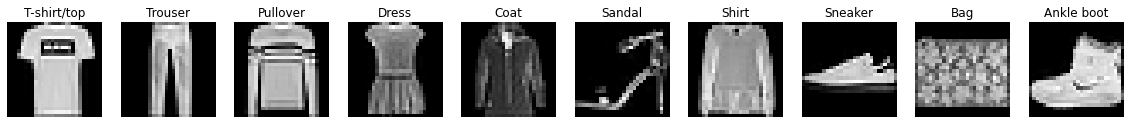

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
          
no_of_classes = len(class_names)
fig, axes = plt.subplots(1, no_of_classes, figsize=(20,20))

for i in range(no_of_classes):

    # Find the index of the first image of each class
    idx = np.where(y_train == i)[0][0]
    
    # Plot the image
    axes[i].imshow(x_train[idx].reshape(28,28), cmap='gray')
    axes[i].set_title(class_names[i])
    axes[i].axis('off')

plt.show()




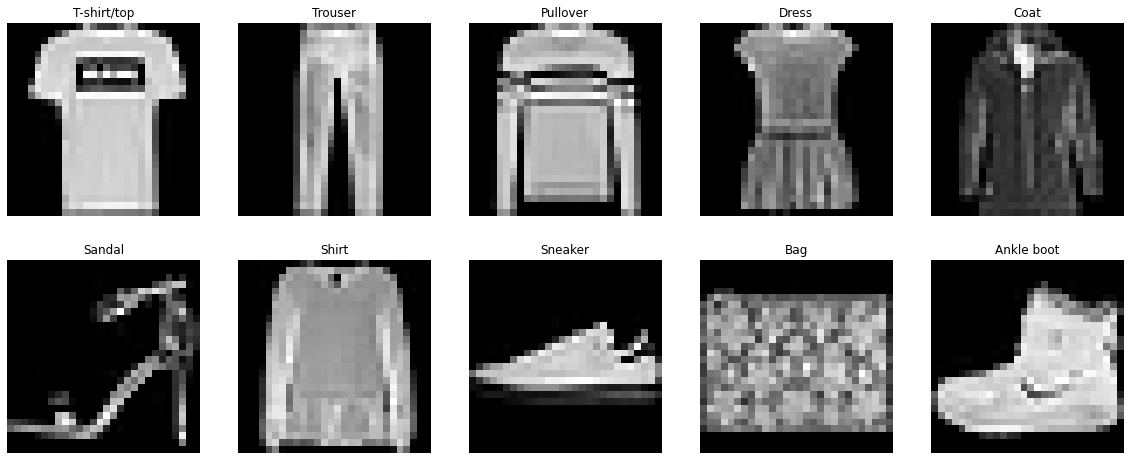

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot images in rows of 5
no_of_classes = len(class_names)
num_rows = 2
num_cols = 5
num_images = num_rows * num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20,8))

for i in range(num_images):
    # Calculate the row and column index of the current image
    row = i // num_cols
    col = i % num_cols
    
    # Find the index of the ith image of each class
    idx = np.where(y_train == i % no_of_classes)[0][i // no_of_classes]
    
    # Plot the image
    axes[row, col].imshow(x_train[idx].reshape(28,28), cmap='gray')
    axes[row, col].set_title(class_names[i % no_of_classes])
    axes[row, col].axis('off')

plt.show()

# Question 2 

Implement a feedforward neural network which takes images from the fashion-mnist data as input and outputs a probability distribution over the 10 classes.

In [6]:
L = int(input("Enter the number of Hidden + outer layer: "))

Enter the number of Hidden + outer layer: 3


In [7]:
n = int(input("Enter the numbers of neuron in each hidden layer: "))

Enter the numbers of neuron in each hidden layer: 16


In [8]:
no_of_classes = len(np.unique(y_train))

In [9]:
choice = int(input("For random weights initialisation enter 1 and for xavier enter 2: "))

For random weights initialisation enter 1 and for xavier enter 2: 1


In [130]:
def weights(choice, n, L, X_train, no_of_classes):
  
  Weights = []
  np.random.seed(0)

  if choice ==1:
    temp = np.random.rand(len(X_train[0]), n)
    Weights.append(temp)

    for i in range(1, L-1):
      temp = np.random.rand(n, n)
      Weights.append(temp)

    temp = np.random.rand(n, no_of_classes)
    Weights.append(temp)

  if choice ==2:
    scale = 1/max(1, (2+2)/2 )
    limit = math.sqrt(3*scale)

    temp = np.random.uniform(-limit, limit, size=(len(X_train[0]),n)) 
    Weights.append(temp)
    for i in range(1, L-1):
      temp  = np.random.uniform(-limit, limit, size=(n,n))
      Weights.append(temp)

    temp = np.random.uniform(-limit, limit, size=(n, no_of_classes)) 
    Weights.append(temp)

  if choice ==3:
    temp = np.zeros((len(X_train[0]), n))
    Weights.append(temp)

    for i in range(1, L-1):
      temp = np.zeros(n, n)
      Weights.append(temp)

    temp = np.zeros((n, no_of_classes))
    Weights.append(temp)

  
  return Weights



In [131]:
def biases(choice, n, L, no_of_classes):
  
  bias = []
  np.random.seed(0)

  if choice ==1:
    for i in range(L-1):
      temp = np.random.rand(n)
      bias.append(temp)

    temp = np.random.rand(no_of_classes)
    bias.append(temp)

  if choice ==2:
    scale = 1/max(1, (2+2)/2 )
    limit = math.sqrt(3*scale)
    for i in range(L-1):
      temp  = np.random.uniform(-limit, limit, size=(n))
      bias.append(temp)

    temp = np.random.uniform(-limit, limit, size=(no_of_classes)) 
    bias.append(temp)

  if choice ==3:
    for i in range(L-1):
      temp = np.zeros(n)
      bias.append(temp)

    temp = np.zeros(no_of_classes)
    bias.append(temp)

  
  return bias


In [12]:
Weights = weights(choice, n, L, X_train, no_of_classes)

In [ ]:
Weights[0]

In [13]:
bias = biases(choice, n, L, no_of_classes)

In [ ]:
a = np.dot(X_train, Weights[0]) + bias[0]

In [ ]:
temp = np.zeros(a.shape)
for ele in a:
  for num in ele:
    num = max(0,num)

In [ ]:
f = [[-1,3],[-2,3]]
i=0
for ele in f:
  j=0
  for num in ele:
    f[i][j] = max(0,num)
    j+=1
  i+=1

In [ ]:
f

[[0, 3], [0, 3]]

In [ ]:
a.shape

(60000, 16)

In [ ]:
h = sigmoid(a)

In [ ]:
h.shape

(60000, 16)

In [16]:
a = np.dot(X_train[0], Weights[0]) + bias[0]

In [24]:
h = sigmoid(a)

In [25]:
a = np.dot(h, Weights[1]) + bias[1]

In [26]:
h = sigmoid(a)

In [27]:
a = np.dot(h, Weights[2]) + bias[2]

In [29]:
a.shape

(10,)

In [32]:
y_dash = softmax(a)

In [39]:
y_dash

array([0.00849369, 0.22513162, 0.03178054, 0.16502367, 0.17916811,
       0.07638947, 0.04629212, 0.19165303, 0.02780864, 0.04825912])

In [38]:
temp = np.zeros(10)
temp[y_train[0]] = 1
temp

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [42]:
output_gradient = -(temp - y_dash)

In [43]:
output_gradient

array([ 0.00849369,  0.22513162,  0.03178054,  0.16502367, -0.82083189,
        0.07638947,  0.04629212,  0.19165303,  0.02780864,  0.04825912])

In [ ]:
h = [1,2,3,4]
g = [[1,2,3,4],[1,2,3,4]]
#np.matmul(h,g)
exp_logits = np.exp(h)
y_dash = exp_logits / np.sum(exp_logits, axis=0, keepdims=True)
y_dash.shape

(4,)

In [ ]:
l = []
l.append(h)
l.append(g)

In [ ]:
l[1]

[[1, 2, 3, 4], [1, 2, 3, 4]]

Activation Functions

In [31]:
def sigmoid(a):
  return 1/(1+np.exp(-a))

def tanh(a):
  return (np.exp(a)-np.exp(-a))/(np.exp(a)+np.exp(-a))

def ReLu(a):
  i=0
  for ele in a:
    j=0
    for num in ele:
      a[i][j] = max(0,num)
      j+=1
    i+=1
  return a

def softmax(a):
  exp_logits = np.exp(a)
  return exp_logits / np.sum(exp_logits, axis=0, keepdims=True)   
  
def der_sigmoid(a):
  return sigmoid(a)*(1-sigmoid(a))

def der_tanh(a):
  return 1-(tanh(a)*tanh(a))

def der_ReLu(a):

  # it will create a matrix of same dimension as of a.
  gradient = np.zeros_like(a)  
  # sets the entries of gradient to 1 where the corresponding entries of x>=0
  gradient[a >= 0] = 1
  return gradient

In [ ]:
1-np.zeros((1,2))

array([[1., 1.]])

Forward Propagation

In [44]:
def forward_propagation(Weights, bias, h, L):
  
  a_out = []
  h_out = []
  h_out.append(h)
  
  ## for hidden layers
  for k in range(L-1):
    a = np.dot(h, Weights[k]) + bias[k]
    a_out.append(a)
    ## default activation function is sigmoid 
    h = sigmoid(a)
    h_out.append(h)

  ## In outer layer softmax function
  a = np.dot(h, Weights[L-1]) + bias[L-1]
  a_out.append(a)
  y_dash = softmax(a)
  

  return a_out, h_out, y_dash


In [46]:
a_out, h_out, y_dash = forward_propagation(Weights, bias, X_train[0], L)

In [48]:
sum(-np.log(y_dash))

27.13984216418111

In [52]:
len(h_out)

3

Backward propagation

In [33]:
i=0
y_train_modified = np.zeros((len(y_train), 10))
for value in y_train:
  temp = np.zeros(10)
  temp[value] = 1
  y_train_modified[i] = temp
  i+=1

In [34]:
output_gradient = -(y_train_modified - y_dash)

In [ ]:
output_gradient.shape

(60000, 10)

In [65]:
h_out[2].reshape(1,len(h_out[2])).shape

(1, 16)

In [35]:
delta_W = [0]*L
delta_b = [0]*L

In [36]:
d = np.dot(h_out[2].T, output_gradient)

In [37]:
delta_W[2] = d
delta_b[2] = output_gradient

In [39]:
weight = Weights[2]
weight.shape

(16, 10)

In [40]:
h_gradient = np.dot(output_gradient, weight.T)

In [41]:
s= der_sigmoid(a_out[1])

In [42]:
h_gradient.shape, s.shape

((54000, 16), (54000, 16))

In [43]:
output_gradient = np.multiply(h_gradient, der_sigmoid(a_out[1]))

In [44]:
output_gradient.shape

(54000, 16)

In [45]:
h_out[1].shape, output_gradient.shape

((54000, 16), (54000, 16))

In [46]:
W_gradient = np.dot(h_out[1].T, output_gradient)

In [47]:
W_gradient.shape

(16, 16)

In [48]:
delta_W[1] = W_gradient
delta_b[1] = output_gradient

In [ ]:
output_gradient.shape, weight.shape

((60000, 16), (16, 16))

In [49]:
weight = Weights[1]


In [50]:
h_gradient = np.dot(output_gradient, weight.T)

In [ ]:
h_gradient.shape, der_sigmoid(a_out[0]).shape

((60000, 16), (60000, 16))

In [51]:
output_gradient = np.multiply(h_gradient, der_sigmoid(a_out[0]))

In [52]:
output_gradient.shape, (h_out[0].T).shape

((54000, 16), (784, 54000))

In [53]:
W_gradient = np.dot(h_out[0].T, output_gradient)

In [ ]:
W_gradient*0.001

In [54]:
delta_W[0] = W_gradient
delta_b[0] = output_gradient

In [ ]:
delta_W = 

list

In [63]:
v = np.multiply(delta_W, [0.01,0.01,0.01])

<ipython-input-63-34b6f8c8877a>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  v = np.multiply(delta_W, [0.01,0.01,0.01])


In [62]:
s = [np.ones((2,2)),np.ones((2,3)),np.ones((3,2))]
i = np.multiply(s, [0.01,0.01,0.01])

<ipython-input-62-9fe08c1e01cd>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  i = np.multiply(s, [0.01,0.01,0.01])


In [66]:
v[0].shape

(784, 16)

In [68]:
np.ones((2,2,3))*0.01

array([[[0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01]],

       [[0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01]]])

In [62]:
p = np.dot(output_gradient.reshape(len(output_gradient),1), h_out[2].reshape(1,len(h_out[2])))

In [63]:
p.shape

(10, 16)

In [117]:
def backward_propagation(a_out, h_out, y_train, y_dash, Weights, L):

  delta_W = [0]*L
  delta_b = [0]*L

  
  
  ## change each y_train into an array of 10 values
  y_train_modified = np.zeros( 10)
  y_train_modified[y_train] = 1
    
  output_gradient = -(y_train_modified - y_dash)

  for k in range(L, 0, -1):

    ## compute gradients w.r.t parameters
    W_gradient = np.dot(h_out[k-1].reshape(len(h_out[k-1]),1), output_gradient.reshape(1, len(output_gradient)))
    delta_W[k-1] = W_gradient

    b_gradients = output_gradient
    delta_b[k-1] = b_gradients
   
    if k==1:
      continue
    ## compute gradients w.r.t layer below
    weight = Weights[k-1]
    h_gradient = np.dot(output_gradient, weight.T)

    ## compute the gradient of pre activation layer
    output_gradient = np.multiply(h_gradient, der_sigmoid(a_out[k-2]))

  return delta_W, delta_b



In [115]:
v  = np.dot(h_out[2].reshape(len(h_out[2]),1), output_gradient.reshape(1,len(output_gradient)))

In [116]:
v.shape

(16, 10)

In [118]:
delta_W, delta_b = backward_propagation(a_out, h_out, y_train[0], y_dash, Weights, L)

In [100]:

a = [1,2,3,4]


Gradient Descent Algorithm

In [86]:
def gradient_descent(learning_rate, Weights, bias, h, L, y_train):

  dW = weights(3, n, L, X_train, no_of_classes)
  for x,y in zip(X_train,y_train):

    ## Forward propagation
    a_out, h_out, y_dash = forward_propagation(Weights, bias, x, L)

    ## Backward Propagation
    delta_W, delta_b = backward_propagation(a_out, h_out, y, y_dash, Weights, L)

  ## Weights and biases updates
   # Weights updates
  Weights = Weights - np.multiply(delta_W, [learning_rate]*L)

   # Biases updates
  bias = bias - np.multiply(delta_b, [learning_rate]*(L))



In [132]:
dW = weights(3, n, L, X_train, no_of_classes)

TypeError: ignored

In [95]:
delta_b[2].shape

(54000, 10)

In [93]:
p = np.multiply(delta_W, [0.0001]*L)

<ipython-input-93-465e1607647a>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  p = np.multiply(delta_W, [0.0001]*L)


((2, 54000, 16), 2)

In [71]:
s = np.multiply(np.ones((2,1000,8)), [0.0001]*(2))

ValueError: ignored

In [67]:
[0.0001]*(2)

[0.0001, 0.0001]

In [88]:
for epoch in range(10):
  
  gradient_descent(0.0001, Weights, bias, X_train, L, y_train)
  print(epoch, sum(sum(-np.log(y_dash))))


<ipython-input-86-8bf1c73ee0ae>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Weights = Weights - np.multiply(delta_W, [learning_rate]*L)
<ipython-input-86-8bf1c73ee0ae>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  bias = bias - np.multiply(delta_b, [learning_rate]*(L))


ValueError: ignored

momentum based gradient descent

In [ ]:
u_o = 0
def momentum_GD(learning_rate, Weights, bias, bias_Lth_layer, h, L, y_train, beta):
  ## Forward propagation
  a_out, h_out, y_dash = forward_propagation(Weights, bias, bias_Lth_layer, h, L)

  ## Backward Propagation
  delta_W, delta_b = backward_propagation(a_out, h_out, y_train, y_dash, Weights, L)

  ## momentum based wight updates
  u_W = np.multiply(u_o, [beta]*L) + delta_W


  ## Weights and biases updates
   # Weights updates
  Weights = Weights - np.multiply(u, [learning_rate]*L)

   # Biases updates
  bias = bias - np.multiply(delta_b[:(L-1)], [learning_rate]*(L-1))
  bias_Lth_layer = bias_Lth_layer - (delta_b[L-1])*learning_rate



